## Making plots

This notebook is to use the ranked riders data to make plots to visualize the selected rider's ranking.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
file_path = '../src/ranked/ranked.csv'

# Read the CSV file into a DataFrame
ranked_dataframe = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(ranked_dataframe.head())

                       Namn            Klubb     #         Klass  \
0  Simon Hopander Ankarhake     Nyköpings MS   304  Motion 16-29   
1            Sören Fransson         Kinds MK  1236  Motion 50-59   
2            Niklas Persson     Karlskoga EK    28        Senior   
3            Rikard Hansson         Tibro MK    73        Senior   
4            Jimmy Ivarsson  SMK Trollhättan   559  Motion 40-49   

   Rank FMCK Skövde  Rank Töreboda MK  Rank Tidaholms MK  Rank Carlsborgs MK  \
0               NaN               NaN                NaN                 NaN   
1               NaN               NaN                1.0               161.0   
2               NaN               2.0                NaN                 NaN   
3               NaN               3.0                NaN                 2.0   
4               NaN               NaN                NaN                 NaN   

   Rank Tibro MK  Rank Falköpings MK  AvgRank  
0            NaN                 1.0      1.0  
1            N

## Find one rider.
Test to find data for one rider. In this case me (Robert Ahlin).

In [11]:
def display_row_by_name(name):
    row = ranked_dataframe[ranked_dataframe['Namn'] == name]
    if not row.empty:
        print(row)
    else:
        print(f"No data found for '{name}'.")

# Example: Displaying row for a specific name
display_row_by_name('Robert Ahlin')

             Namn          Klubb    #         Klass  Rank FMCK Skövde  \
547  Robert Ahlin  Falköpings MK  919  Motion 40-49             294.0   

     Rank Töreboda MK  Rank Tidaholms MK  Rank Carlsborgs MK  Rank Tibro MK  \
547             304.0                NaN                 NaN          220.0   

     Rank Falköpings MK  AvgRank  
547                 NaN    257.0  


## Show line chart for selected riders.
Testing show a line chart for several selected riders.

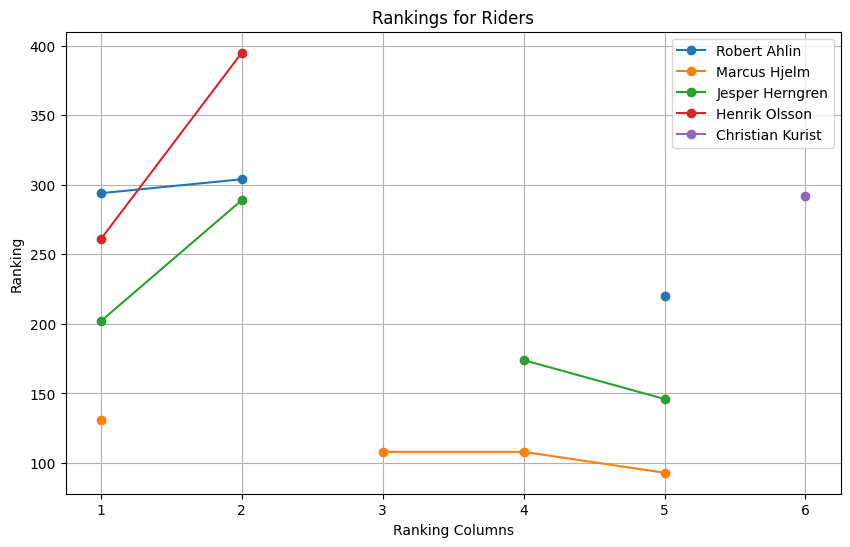

In [12]:
# Function to plot rankings for specific riders
def plot_rankings(dataframe, rider_names):
    plt.figure(figsize=(10, 6))

    for rider_name in rider_names:
        # Filter data for the rider
        rider_data = dataframe[dataframe['Namn'] == rider_name]

        # Get ranking columns
        ranking_columns = [col for col in rider_data.columns if col.startswith('Rank')]

        # Convert columns to numeric using .loc to avoid SettingWithCopyWarning
        for col in ranking_columns:
            rider_data.loc[:, col] = pd.to_numeric(rider_data[col], errors='coerce')


        # Extract rider's rankings
        rankings = rider_data[ranking_columns].fillna(np.nan).values.flatten().astype(float)

        # Plot rankings as a line chart for each rider
        plt.plot(range(1, len(rankings) + 1), rankings, marker='o', label=rider_name)

    plt.xlabel('Ranking Columns')
    plt.ylabel('Ranking')
    plt.title('Rankings for Riders')
    plt.legend()
    plt.grid(True)  # Add grid lines
    plt.show()

# Example: Plot rankings for multiple riders
riders_to_plot = ['Robert Ahlin', 'Marcus Hjelm', 'Jesper Herngren', 'Henrik Olsson', 'Christian Kurist']
plot_rankings(ranked_dataframe, riders_to_plot)

## Look up all different clubbs in "Klubb" column

In [13]:
# Get unique Klubb values from ranked_dataframe
unique_klubbs = ranked_dataframe['Klubb'].unique()
print(unique_klubbs)

['Nyköpings MS' 'Kinds MK' 'Karlskoga EK' 'Tibro MK' 'SMK Trollhättan'
 'Linköpings MS' 'Falköpings MK' 'Kullings MS' 'Tidaholms MK'
 'Hallsbergs MK' 'Försvarsmaktens EK' 'SMK Vingåker' 'FMCK Skövde'
 'Götene MK' 'Battle of Vikings Sportförening' 'MK Orion' 'BMK Uddevalla'
 'Örebro EK' 'Solshesters MCK' 'FMCK Hässleholm' 'Göta MS' 'Skene MS'
 'Norrahammars MK' 'Hjo MK' 'Tranås MS' 'Laxå MK' 'Vimmerby MS'
 'Gotland Enduro Cross MS' 'Lier MSK' 'SMK Värnamo' 'FMCK Borås'
 'Borg mc klubb' 'Lilla Edets MCK' 'Finspångs MS' 'Djursdala SK'
 'MK Pionjär' 'Älvbygdens MK' 'Notodden Crossklubb' 'Huskvarna MK'
 'Bodafors MK' 'MC Alingsås' 'Töreboda MK' 'Stenungsunds MS' 'SMK Eksjö'
 'Björkö EK' 'Varbergs MK' 'Carlsborgs MK' 'Wäxjö MS' 'SMK Östgöta'
 'Kortedala MK' 'Bengtsfors MCC' 'Flittig' 'Team Westom Motorcykel'
 'Fjugesta MS' 'SMK Kolmården' 'FMCK Strängnäs' 'Jevnaker MK'
 'Ulricehamns MK' 'Tranemo MK' 'Karlstad MX Klubb' 'Sotenäs MCC'
 'Kungsbacka MA' 'SMK Vadstena' 'Kristdala Motorsällskap' '

## Create a line chart from a selected Club (Falköpings MK)

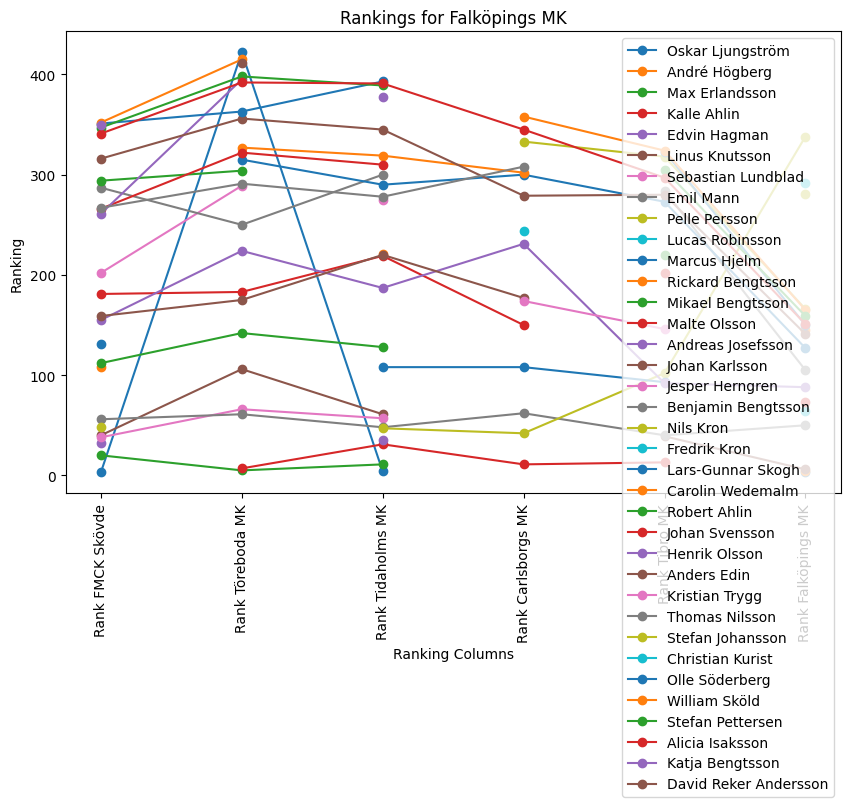

In [14]:
import matplotlib.pyplot as plt

# Select a specific Klubb
selected_klubb = 'Falköpings MK'

# Filter data for the selected Klubb
klubb_data = ranked_dataframe[ranked_dataframe['Klubb'] == selected_klubb]

# Get all 'Namn' values for the selected Klubb
namn_values = klubb_data['Namn'].tolist()

# Extract column names for Rank values (finding columns starting with 'Rank')
rank_columns = [col for col in klubb_data.columns if col.startswith('Rank')]

# Plot Rank values for each 'Namn' in the selected Klubb
plt.figure(figsize=(10, 6))

for namn in namn_values:
    # Filter data for each 'Namn'
    rider_data = klubb_data[klubb_data['Namn'] == namn][rank_columns].values.flatten()
    
    # Plot the 'Rank' values for each 'Namn'
    plt.plot(rank_columns, rider_data, marker='o', label=namn)

plt.xlabel('Ranking Columns')
plt.ylabel('Ranking')
plt.title(f'Rankings for {selected_klubb}')
plt.legend()
plt.xticks(rank_columns, rotation=90)  # Set the x-axis ticks to Rank column names
plt.show()